In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from pathlib import Path
import os
import json
import sys, json
from IPython.display import display, HTML

pd.options.display.max_columns = None
pd.options.display.max_rows = None





In [3]:


def show_graphs(top_level_dir, timesteps = True):
    """
    Shows all the results in a directory from 
    """
    #This should point to wherever the results file is
    files = []

    for path in Path(top_level_dir).rglob('result.json'):
        
        files.append(path.__str__())

    #print(files)

    all_dfs = {}
    for file in files:

        #Extract the filename
        filename = file.split("/")[1]
        
        #print(filename)
        data = [json.loads(line) for line in open(file, 'r')]

        data_dict = {   'episode_len_mean':[], 
                        'timesteps_total':[], 
                        'episode_reward_mean':[],
                        'timesteps_this_iter':[],
                    }

        for i in data:
            data_dict['episode_len_mean'].append(i["episode_len_mean"])
            data_dict['timesteps_total'].append(i['timesteps_total'])
            data_dict['episode_reward_mean'].append(i['episode_reward_mean'])
            data_dict['timesteps_this_iter'].append(i['timesteps_this_iter'])


        df=pd.DataFrame.from_dict(data_dict,orient='index').transpose()
        
        #df.plot(x='timesteps_total', y='episode_len_mean', style='-', title=filename)
        all_dfs[filename] = df
    
    return all_dfs

#a = show_graphs("maze_results")
#print(type(a))


In [15]:
def show_graphs_progress(top_level_dir, timesteps = True):
    """
    Shows all the results in a directory from 
    """
    #This should point to wherever the results file is
    files = []

    for path in Path(top_level_dir).rglob('progress.csv'):
        
        files.append(path.__str__())

    for f in files:
        df = pd.read_csv(f)
        
    print(df['episode_len_mean'])
    #print(df.head)

    
    
    

show_graphs_progress("wenc_chaser_1r_rsrg_1m/3x3")

0      52.770270
1      52.440000
2      40.930000
3      50.970000
4      40.722772
5      45.550000
6      41.100000
7      41.310000
8      40.200000
9      42.290000
10     39.931373
11     39.890000
12     38.451923
13     35.883929
14     32.174603
15     33.879310
16     27.958621
17     27.985915
18     33.375000
19     28.750000
20     25.379747
21     29.909774
22     21.400000
23     23.224138
24     21.010582
25     21.042105
26     19.687805
27     19.661765
28     18.313364
29     17.093220
30     18.933333
31     18.658879
32     17.476190
33     18.834906
34     17.504386
35     17.672566
36     18.144796
37     16.201613
38     18.311927
39     19.024038
40     17.235043
41     15.178030
42     15.944223
43     17.720000
44     16.413934
45     17.206009
46     16.864979
47     15.754941
48     16.872340
49     16.508264
50     17.122363
51     16.600000
52     16.820084
53     18.693396
54     15.277567
55     16.052000
56     15.083019
57     15.226923
58     16.0515

In [20]:
"""
Generate episode length graphs for Chaser
"""


def get_df(top_level_dir, column = "episode_len_mean"):
    """
    Shows all the results in a directory from 
    """
    #This should point to wherever the results file is
    files = []

    for path in Path(top_level_dir).rglob('result.json'):
        files.append(path.__str__())
        
    print(files)

    all_dfs = {}
    data_dict = {}
    steps_dict = {}
    
    for file in files:

        #Extract the filename
        filename = file.split("/")[-2]
        
        #print(filename)
        data = [json.loads(line) for line in open(file, 'r')]

        data_dict[filename] = []
        steps_dict[filename+'_xval'] = []
        
        
        for i in data:
            data_dict[filename].append(i[column])
            steps_dict[filename+'_xval'].append(i['timesteps_total'])

    return data_dict, steps_dict

def parse_label(label):
    label = label.split("_")[0]
    return label

def generate_multi_graph(top_dir, column, baseline_val = 0):

    data_dict, steps_dict = get_df(top_dir, column=column)
    #print(data_dict)

    fig = plt.figure(figsize = (15,15))
    ax1 = fig.add_subplot(111)

    for idx in data_dict:
        ax1.plot(steps_dict[idx+"_xval"], data_dict[idx], label = parse_label(idx))
    plt.hlines(baseline_val,0,1000000, label = "baseline Q*")
    
    plt.legend(loc='upper left', prop={'size':15});
    plt.xlabel("timesteps")
    plt.ylabel(column)
    plt.ylim(0,100)
    plt.title(top_dir)

    plt.show()



#generate_multi_graph("maze_results", column = "episode_len_mean")


# df=pd.DataFrame.from_dict(data_dict,orient='index').transpose()
# display(df)

# df.plot(figsize = (10,10))



['wenc_chaser_1r_rsrg_1m/3x3/A3C_chaser_rstart_rgoal_1msteps-3x3-A3C/A3C_GridEvaderEnv_0_2020-04-21_15-08-09fj3y9m08/result.json', 'wenc_chaser_1r_rsrg_1m/3x3/DQN_chaser_rstart_rgoal_1msteps-3x3-DQN/DQN_GridEvaderEnv_0_2020-04-21_12-36-596cmv_3oo/result.json', 'wenc_chaser_1r_rsrg_1m/3x3/PPO_chaser_rstart_rgoal_1msteps-3x3-PPO/PPO_GridEvaderEnv_0_2020-04-21_11-33-444wkjpc30/result.json']


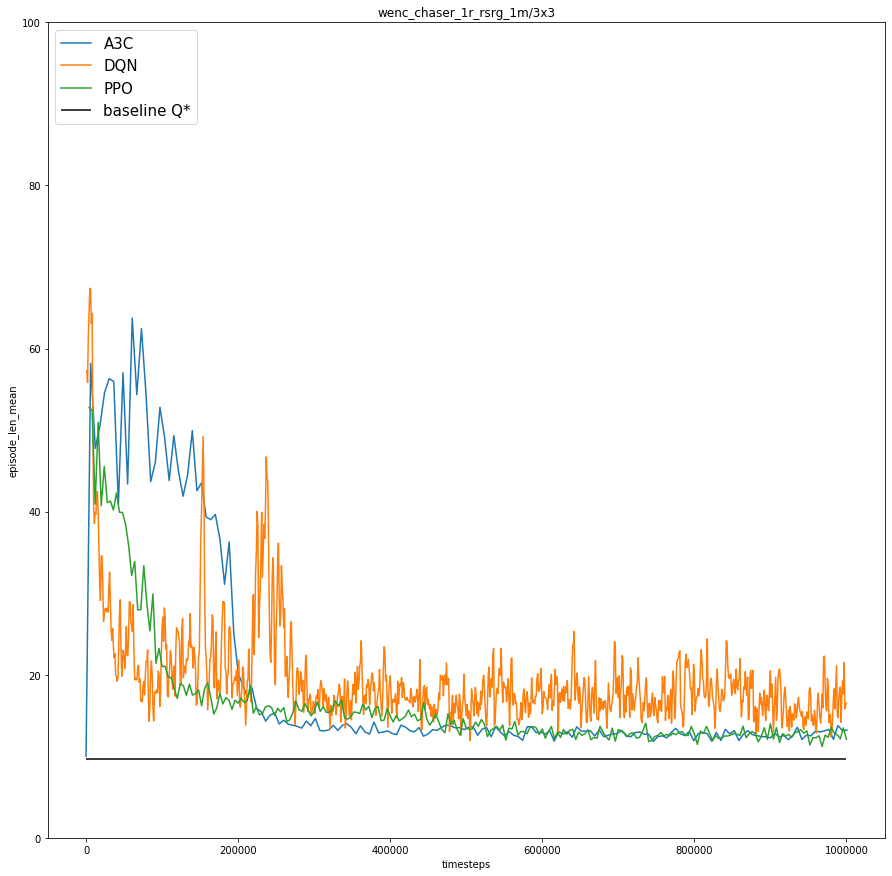

['wenc_chaser_1r_rsrg_1m/5x5/DQN_chaser_rstart_rgoal_1msteps-5x5-DQN/DQN_GridEvaderEnv_0_2020-04-21_13-26-33h6qq3l16/result.json', 'wenc_chaser_1r_rsrg_1m/5x5/PPO_chaser_rstart_rgoal_1msteps-5x5-PPO/PPO_GridEvaderEnv_0_2020-04-21_11-52-58x5ftwiz7/result.json', 'wenc_chaser_1r_rsrg_1m/5x5/A3C_chaser_rstart_rgoal_1msteps-5x5-A3C/A3C_GridEvaderEnv_0_2020-04-21_15-22-15zl7esgmj/result.json']


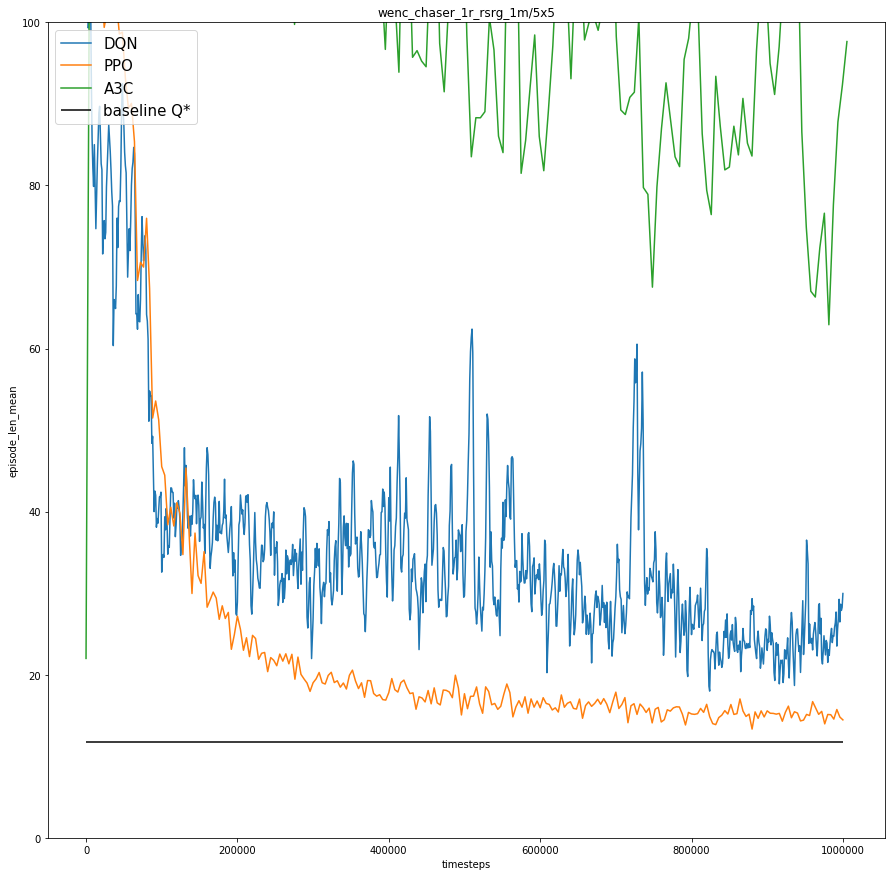

['wenc_chaser_1r_rsrg_1m/8x8/PPO_chaser_rstart_rgoal_1msteps-8x8-PPO/PPO_GridEvaderEnv_0_2020-04-21_12-13-43ce966h0o/result.json', 'wenc_chaser_1r_rsrg_1m/8x8/DQN_chaser_rstart_rgoal_1msteps-8x8-DQN/DQN_GridEvaderEnv_0_2020-04-21_14-16-32qvhnm9vg/result.json', 'wenc_chaser_1r_rsrg_1m/8x8/A3C_chaser_rstart_rgoal_1msteps-8x8-A3C/A3C_GridEvaderEnv_0_2020-04-21_15-36-22o1zul_o3/result.json']


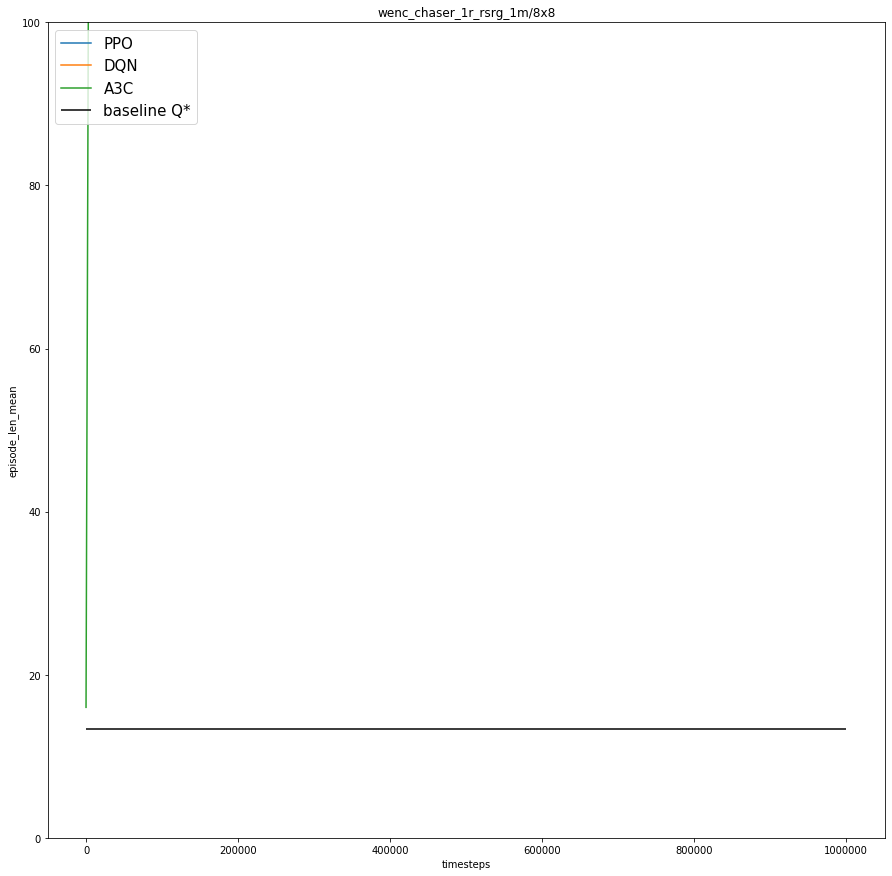

In [21]:
#Chaser Graphs
generate_multi_graph("wenc_chaser_1r_rsrg_1m/3x3", column = "episode_len_mean", baseline_val = 9.72)
generate_multi_graph("wenc_chaser_1r_rsrg_1m/5x5", column = "episode_len_mean", baseline_val = 11.7)
generate_multi_graph("wenc_chaser_1r_rsrg_1m/8x8", column = "episode_len_mean", baseline_val = 13.3)

['wenc_evader_1r_rsrg_1m/3x3/A3C_evader_rstart_rgoal_1msteps-3x3-A3C/A3C_GridEvaderEnv_0_2020-04-21_19-29-26arf0_cvd/result.json', 'wenc_evader_1r_rsrg_1m/3x3/DQN_evader_rstart_rgoal_1msteps-3x3-DQN/DQN_GridEvaderEnv_0_2020-04-21_16-54-27s9iyke3s/result.json', 'wenc_evader_1r_rsrg_1m/3x3/PPO_evader_rstart_rgoal_1msteps-3x3-PPO/PPO_GridEvaderEnv_0_2020-04-21_15-51-232uj4l_5o/result.json']


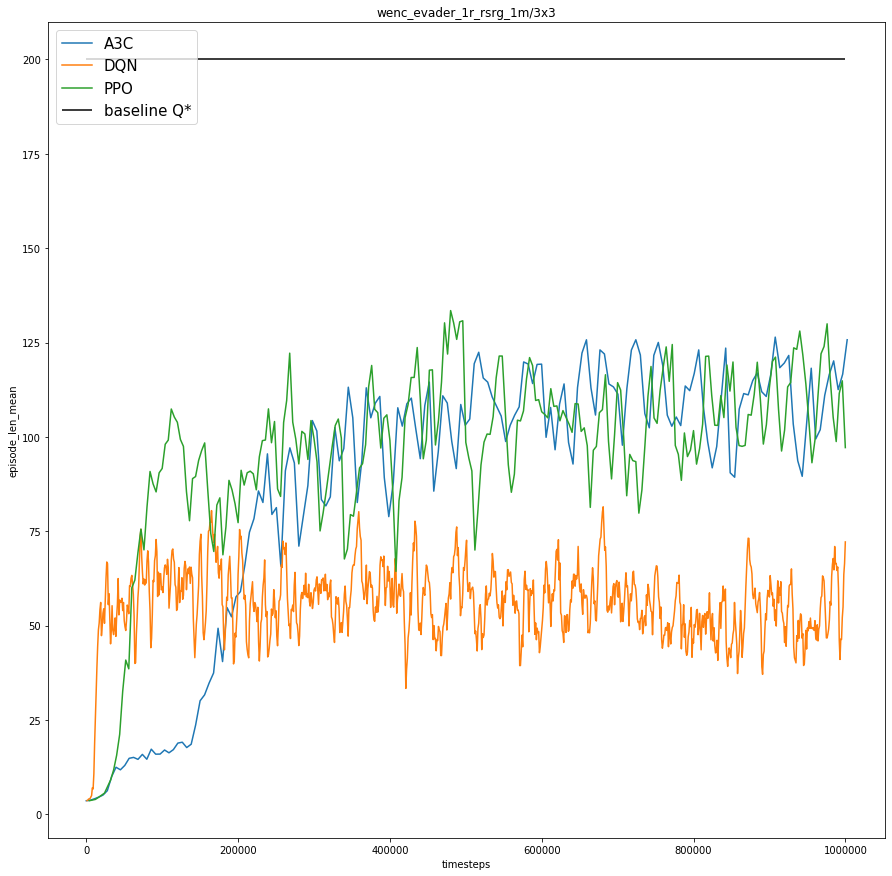

['wenc_evader_1r_rsrg_1m/5x5/A3C_evader_rstart_rgoal_1msteps-5x5-A3C/A3C_GridEvaderEnv_0_2020-04-21_19-43-43yuiz6u27/result.json', 'wenc_evader_1r_rsrg_1m/5x5/PPO_evader_rstart_rgoal_1msteps-5x5-PPO/PPO_GridEvaderEnv_0_2020-04-21_16-10-202g55az4v/result.json', 'wenc_evader_1r_rsrg_1m/5x5/DQN_evader_rstart_rgoal_1msteps-5x5-DQN/DQN_GridEvaderEnv_0_2020-04-21_17-43-38czg1f96b/result.json']


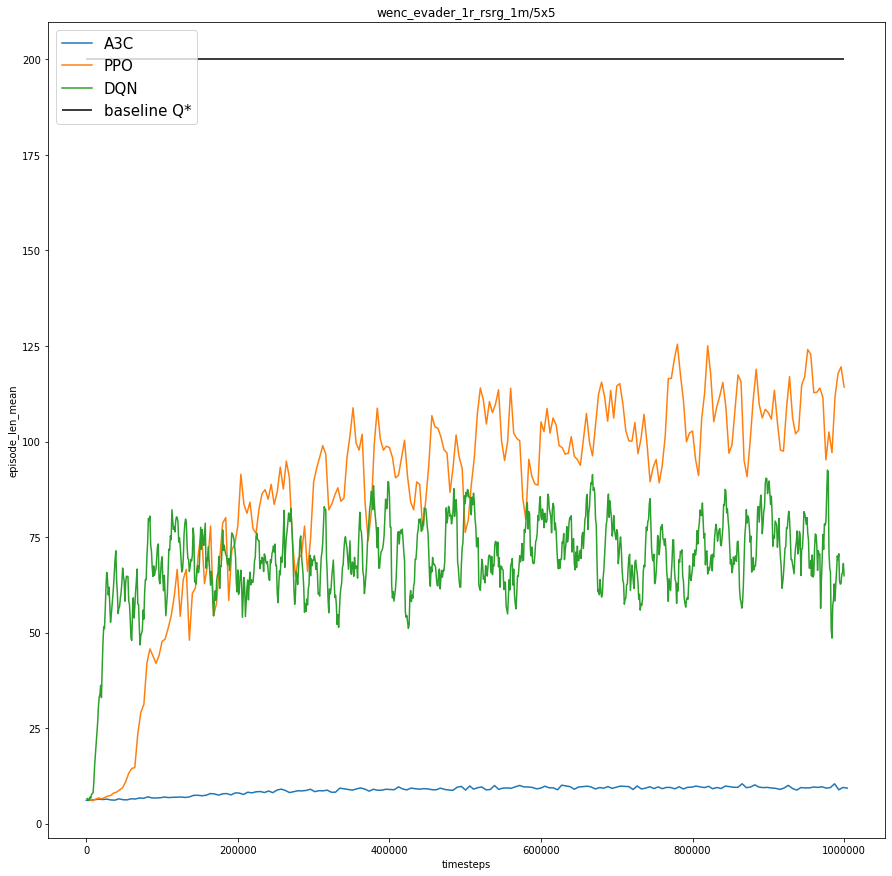

['wenc_evader_1r_rsrg_1m/8x8/A3C_evader_rstart_rgoal_1msteps-8x8-A3C/A3C_GridEvaderEnv_0_2020-04-21_19-59-00wobf0s2x/result.json', 'wenc_evader_1r_rsrg_1m/8x8/PPO_evader_rstart_rgoal_1msteps-8x8-PPO/PPO_GridEvaderEnv_0_2020-04-21_16-30-241a1ggjg4/result.json', 'wenc_evader_1r_rsrg_1m/8x8/DQN_evader_rstart_rgoal_1msteps-8x8-DQN/DQN_GridEvaderEnv_0_2020-04-21_18-35-0834vivzj1/result.json']


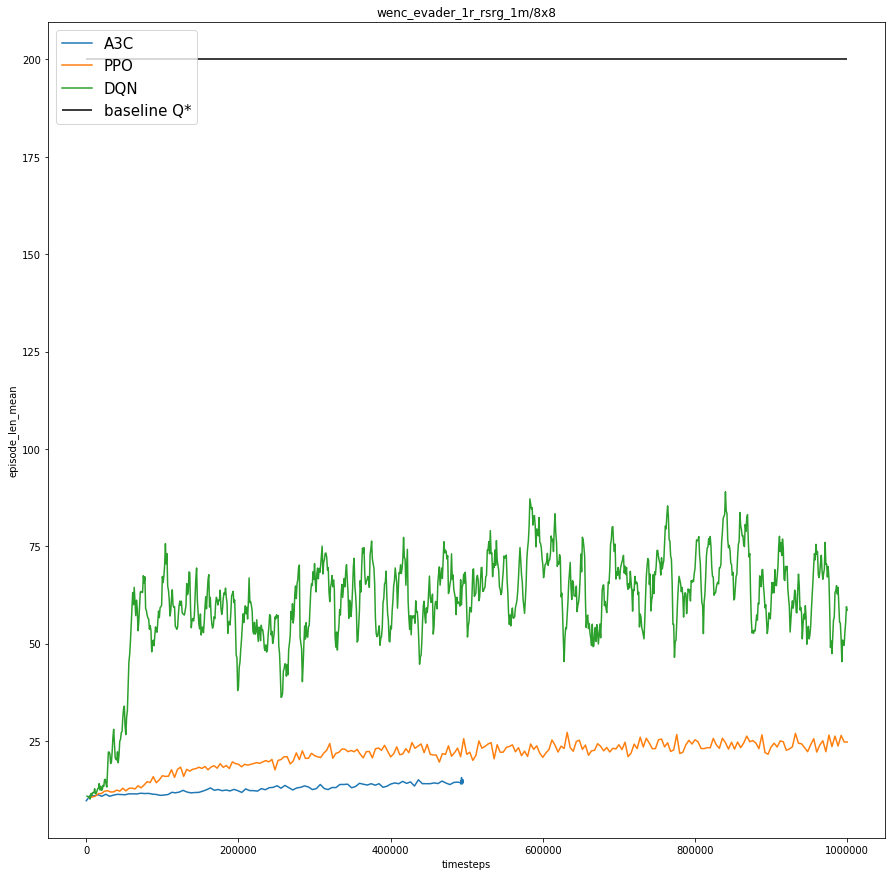

In [6]:
#Evader Graphs
generate_multi_graph("wenc_evader_1r_rsrg_1m/3x3", column = "episode_len_mean", baseline_val = 200)
generate_multi_graph("wenc_evader_1r_rsrg_1m/5x5", column = "episode_len_mean", baseline_val = 200)
generate_multi_graph("wenc_evader_1r_rsrg_1m/8x8", column = "episode_len_mean", baseline_val = 200)
